<a href="https://colab.research.google.com/github/vinodnbhat/AIML-CEP-2021-Assignments/blob/main/SVM_demo_iris%20dataset%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC

np.random.seed(1000)

iris = load_iris()
A = iris.data
print('iris data shape:', A.shape)
print('iris target shape:', iris.target.shape)
print('features of first five samples of iris data:')
iris.data[0:5]

iris data shape: (150, 4)
iris target shape: (150,)
features of first five samples of iris data:


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
print('unique classes:', np.unique(iris.target))
n = iris.data.shape[0]
d = iris.data.shape[1]
print('n:', n, 'd:', d)

unique classes: [0 1 2]
n: 150 d: 4


In [28]:
y = 1.0 * np.ones([A.shape[0], 1])
for i in range(n):
  if iris.target[i] == 0:
    y[i] = 1
  else:
    y[i] = -1

In [29]:
indexarr = np.arange(n)
np.random.shuffle(indexarr)

In [30]:
num_train = int (0.8 * n)
num_test = n - num_train
print('num_train:', num_train, 'num_test:', num_test)

num_train: 120 num_test: 30


In [31]:
train_features = A[indexarr[0:num_train]]
train_label = y[indexarr[0:num_train]]
print('shape of train data features:')
print(train_features.shape)
print('shapeof train data labels')
print(train_label.shape)

shape of train data features:
(120, 4)
shapeof train data labels
(120, 1)


In [32]:
test_features = A[indexarr[num_train:n]]
test_label = y[indexarr[num_train:n]]
print('shape of test data features:')
print(test_features.shape)
print('shapeof test data labels')
print(test_label.shape)

shape of test data features:
(30, 4)
shapeof test data labels
(30, 1)


In [33]:
clf = LinearSVC(tol = 1e-5, random_state = 0)

In [34]:
train_label = np.reshape(train_label, (train_label.shape[0],))
clf_model = clf.fit(train_features, train_label)
predicted_labels = clf_model.predict(test_features)

In [35]:
predicted_labels = np.reshape(predicted_labels.data, (num_test, 1))
#print(predicted_labels)
#print(test_label)

In [36]:
test_error = np.sum(0.5 * np.abs(predicted_labels - test_label))/len(test_label) * 100
test_accuracy = 100 - test_error
print('test set accuracy:', test_accuracy)

test set accuracy: 100.0


In [37]:
predicted_train_labels = clf_model.predict(train_features)
predicted_train_labels = np.reshape(predicted_train_labels, (num_train, 1))
train_label = np.reshape(train_label, (num_train, 1))
train_error = np.sum(0.5 * np.abs(predicted_train_labels - train_label))/len(train_label) * 100
train_accuracy = 100 - train_error
print('train set accuracy:', train_accuracy)

train set accuracy: 100.0


In [38]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(train_label, predicted_train_labels)
print('Confusion matrix train set:')
print(cm_train)

cm_test = confusion_matrix(test_label, predicted_labels)
print('Confusion matrix test set:')
print(cm_test)

Confusion matrix train set:
[[79  0]
 [ 0 41]]
Confusion matrix test set:
[[21  0]
 [ 0  9]]


Text(0.5, 0.98, 'Confusion Matrix')

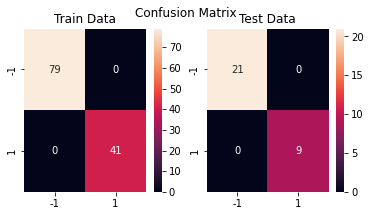

In [39]:
import seaborn as sns
fig, axes = plt.subplots(ncols = 2, figsize = (6, 3))
ax1, ax2 = axes
sns.heatmap(cm_train, annot = True, fmt = 'g', ax = ax1)
sns.heatmap(cm_test, annot = True, fmt = 'g', ax = ax2)
ax1.set_title('Train Data')
ax1.xaxis.set_ticklabels(['-1', '1'])
ax1.yaxis.set_ticklabels(['-1', '1'])

ax2.set_title('Test Data')
ax2.xaxis.set_ticklabels(['-1', '1'])
ax2.yaxis.set_ticklabels(['-1', '1'])

fig.suptitle('Confusion Matrix')

In [40]:
from sklearn.metrics import classification_report
train_cr = classification_report(train_label, predicted_train_labels)
print('Train Report')
print(train_cr)

test_cr = classification_report(test_label, predicted_labels)
print('Test Report')
print(test_cr)

Train Report
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        79
         1.0       1.00      1.00      1.00        41

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Test Report
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

